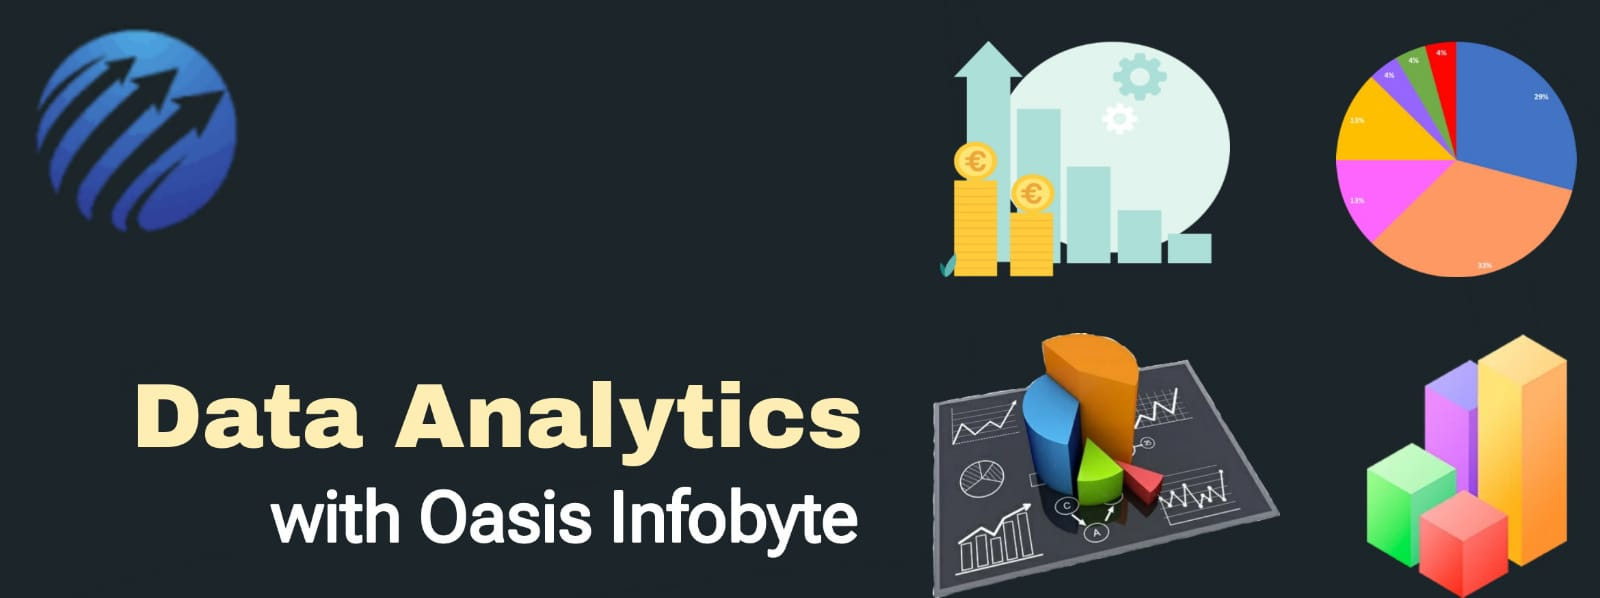

# Oasis infobye Internship, February - 2024
## BOTTU BHAVAN, Data Science Intern

# Sales Prediction with Machine Learning

### Project Overview
Utilizing machine learning to predict product sales.
Predictive factors include advertising expenses, target audience, and advertising platform.
Aim: Assist businesses in optimizing advertising costs and predicting future sales.
Steps


## Introduction:

Brief explanation of sales prediction and its importance in business strategy.
Emphasize the role of data scientists in optimizing advertising costs.


## Dataset:

Explain the relevance of the dataset in predicting sales.
Mention key features like advertising expenses, target audience, and platform.


## Data Preparation:

Load and explore the dataset.
Handle missing values and duplicates if any.
Identify the target variable (sales) and relevant features.


## Data Analysis:

Perform exploratory data analysis to understand the distribution of variables.
Visualize relationships between sales and key features.


## Data Preprocessing:

Encode categorical variables and scale numerical features.
Split the dataset into training and testing sets.


## Model Selection:

Choose appropriate machine learning models for sales prediction.
Consider algorithms like linear regression, decision trees, or ensemble methods.


## Model Training:

Train selected models using the training dataset.
Evaluate model performance using metrics like mean squared error and R2 score.


## Model Interpretation:

Interpret the significance of different features in predicting sales.
Identify factors that contribute most to sales predictions.


## Prediction Interface:

Implement an interface for users to input advertising details and get sales predictions.
Utilize the trained model for real-time predictions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("Task5.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
1,2,44.5,39.3,45.1,10.4
25,26,262.9,3.5,19.5,12.0
101,102,296.4,36.3,100.9,23.8
35,36,290.7,4.1,8.5,12.8
91,92,28.6,1.5,33.0,7.3


In [5]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [6]:
df.sample(5)

,TV,Radio,Newspaper,Sales
68,237.4,27.5,11.0,18.9
175,276.9,48.9,41.8,27.0
185,205.0,45.1,19.6,22.6
24,62.3,12.6,18.3,9.7
46,89.7,9.9,35.7,10.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


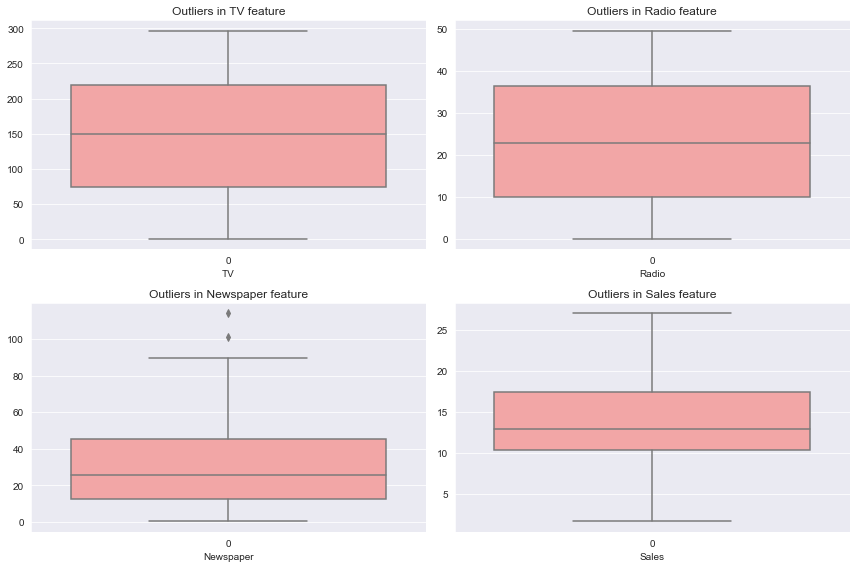

In [24]:
plt.figure(figsize=(12, 8))
columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}
custom_palette = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"]

for i, (plot, col_name) in enumerate(columns.items()):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df[col_name], palette=custom_palette)
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()


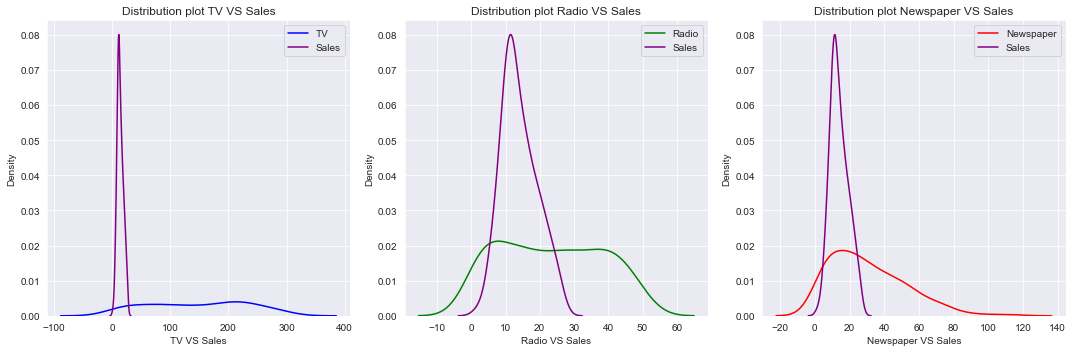

In [23]:
plt.figure(figsize=(15, 5))
columns = {0: "TV", 1: "Radio", 2: "Newspaper"}
colors = ["blue", "green", "red"]

for i, (plot, col_name) in enumerate(columns.items()):
    plt.subplot(1, 3, i + 1)
    sns.distplot(x=df[col_name], hist=False, label=col_name, color=colors[i])
    sns.distplot(x=df["Sales"], hist=False, label="Sales", color="purple")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


In [19]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


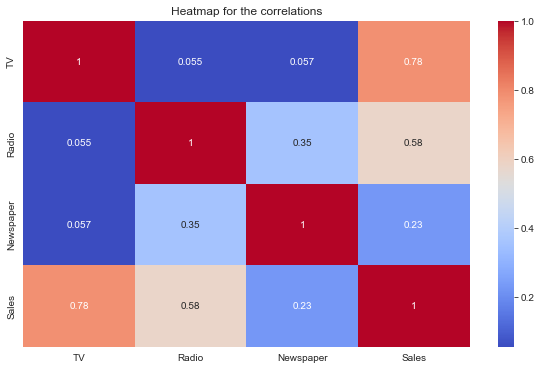

In [26]:
plt.figure(figsize=(10, 6))
custom_cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=custom_cmap)
plt.title("Heatmap for the correlations")
plt.show()


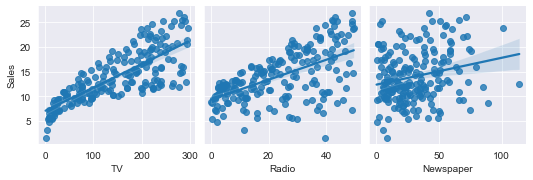

In [28]:
custom_palette = sns.color_palette("muted")
sns.pairplot(data=df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg", palette=custom_palette)
plt.show()


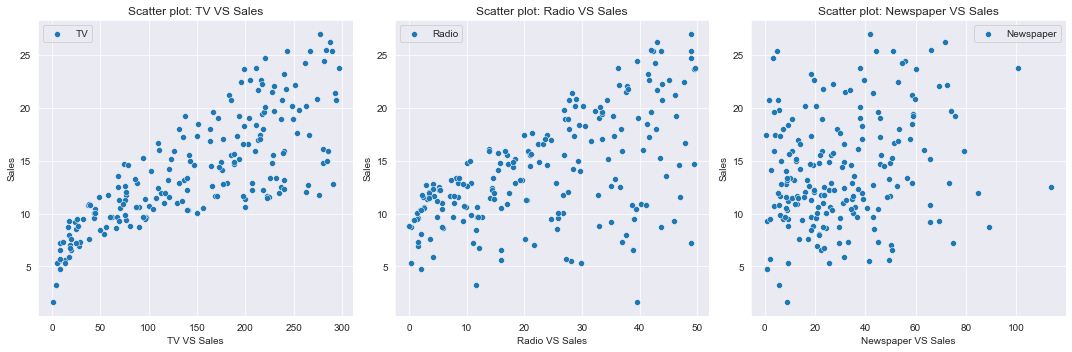

In [30]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}
custom_palette = sns.color_palette("husl")

for i, (plot, col_name) in enumerate(columns.items()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col_name], y=df["Sales"], label=col_name, palette=custom_palette)
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

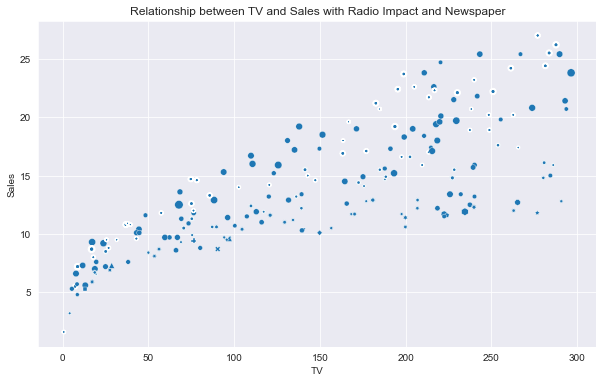

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()


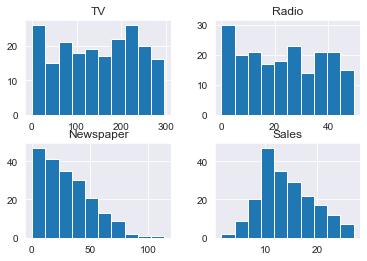

In [34]:
df.hist()
plt.show()

In [35]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
X = df.drop(columns="Sales",axis=1)

In [37]:
y=df["Sales"]

In [38]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [42]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 108.88563941729085
R2 Score: 0.9137298616704539
Cross-Validation R2: 0.8829076766313098


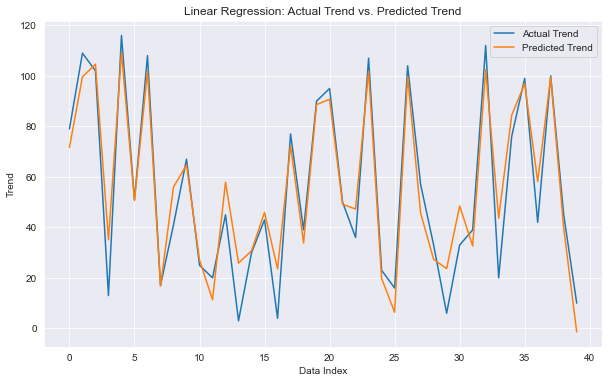


Ridge Regression
Mean Squared Error: 124.16557474271463
R2 Score: 0.9016235624261708
Cross-Validation R2: 0.8744917309227282


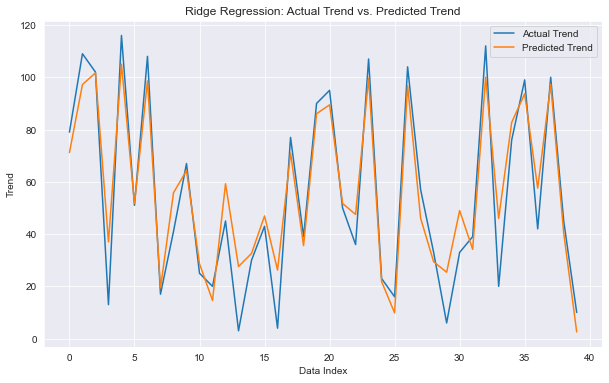


Lasso Regression
Mean Squared Error: 152.6512699193131
R2 Score: 0.8790543340462876
Cross-Validation R2: 0.8556271875371658


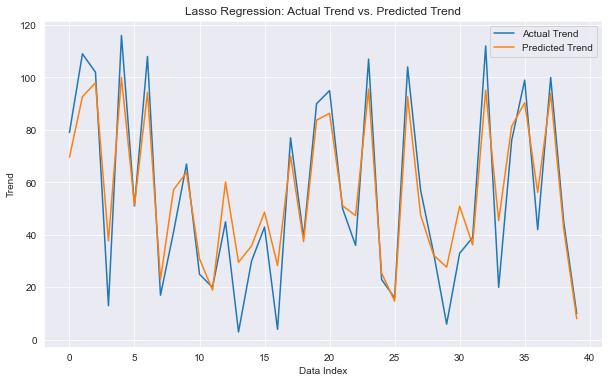

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()    

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 500
Enter the Radio value: 50
Enter the Newspaper value: 20
-------------------------------------
Predicted Sales : [8.98571121]
